In [ ]:
!pip install tensorflow-addons==0.16.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.4 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-addons --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 3.0.2
    Uninstalling typeguard-3.0.2:
      Successfully uninstalled typeguard-3.0.2
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.16.1
    Uninstalling tensorflow-addons-0.16.1:
      Successfully uninstalled tensorflow-addons-0.16.1


In [ ]:
import h5py
import numpy as np
import tensorflow_addons as tfa
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


im= cv2.imread('/content/2.png')
# using loadtxt()
arr = np.loadtxt('/content/2.csv',delimiter=",")
new_in= np.zeros((arr.shape[0],arr.shape[1],4))
new_in[:,:,0]=im[:,:,0]/255.0
new_in[:,:,1]=im[:,:,1]/255.0
new_in[:,:,2]=im[:,:,2]/255.0
new_in[:,:,3]=arr/np.amax(arr)
new_in1=np.expand_dims(new_in, axis=0)

In [ ]:
import h5py
import numpy as np
import tensorflow_addons as tfa
import tensorflow as tf
from keras.models import load_model
model1 = load_model('/content/weights_28_0.06.hdf5', compile=False)
y_pred = model1.predict(new_in1, verbose=0)
print(y_pred)


[[1.9903954]]


In [ ]:
def attentionmap(img_path, true):
    attention_layer =tf.keras.models.Model(inputs=model1.inputs, outputs=model1.get_layer('multi_head_attention_7').output)
    # arr=img_path
    # arr[:,:,:3]=arr[:,:,:3]/255.0
    # arr[:,:,3]= arr[:,:,3]/np.amax(arr[:,:,3])
    # arr1=np.expand_dims(arr, axis=0)
    # y_pred = model1.predict(arr1, verbose=0)
    # print(y_pred,true)
    multi_head_output, attention_maps = attention_layer.predict(img_path)
    final_attention_map = tf.reduce_mean(attention_maps[0][0], axis=1)
    final_attention_map1 = tf.reduce_min(attention_maps[0][0], axis=1)
    final_attention_map2 = tf.reduce_max(attention_maps[0][0], axis=1)
    final_attention_map_0=tf.reshape(final_attention_map, (30,40))
    final_attention_map_1=tf.reshape(final_attention_map1, (30,40))
    final_attention_map_2=tf.reshape(final_attention_map2, (30,40))
    importance_matrix_0 = scipy.ndimage.zoom(final_attention_map_0, 16, order=0)
    importance_matrix_1 = scipy.ndimage.zoom(final_attention_map_1, 16, order=0)
    importance_matrix_2 = scipy.ndimage.zoom(final_attention_map_2, 16, order=0)
    return importance_matrix_0,importance_matrix_1,importance_matrix_2,arr

In [ ]:
import scipy.ndimage
# img_path='/workspace/awadh/nvidia/Shreya/ACPS/depth dataset/original data/w4/5.npy'
i0,i1,i2,arr=attentionmap(new_in1,6)

1/1 [==============================] - 1s 792ms/step


week-2-2

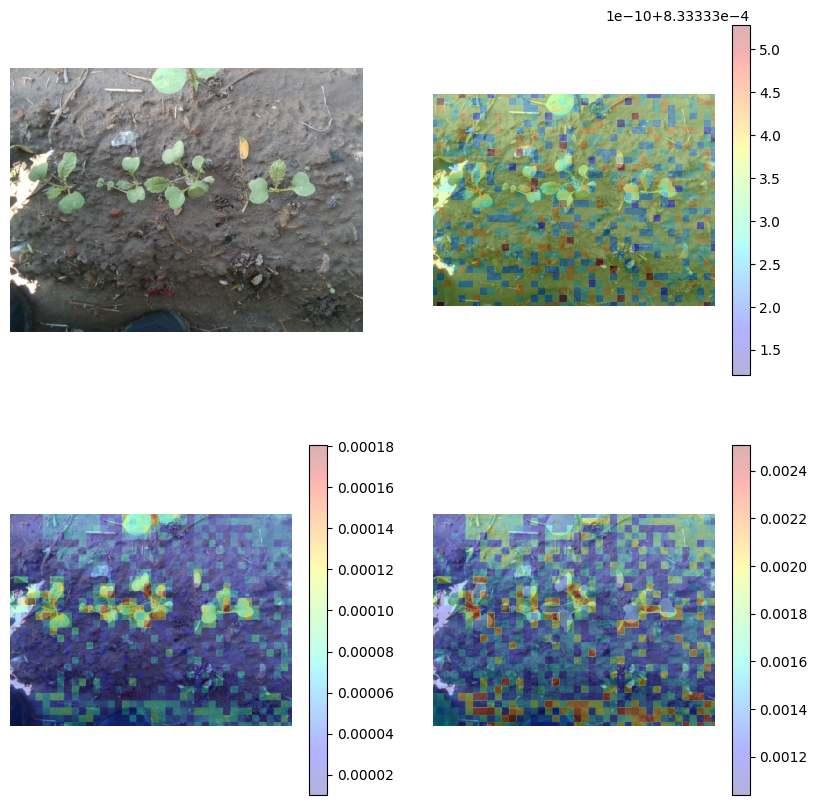

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(new_in[:,:,:3])

plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(new_in[:,:,:3])
plt.imshow(i0, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(new_in[:,:,:3])
plt.imshow(i1, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(new_in[:,:,:3])
plt.imshow(i2, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()

week-3-3

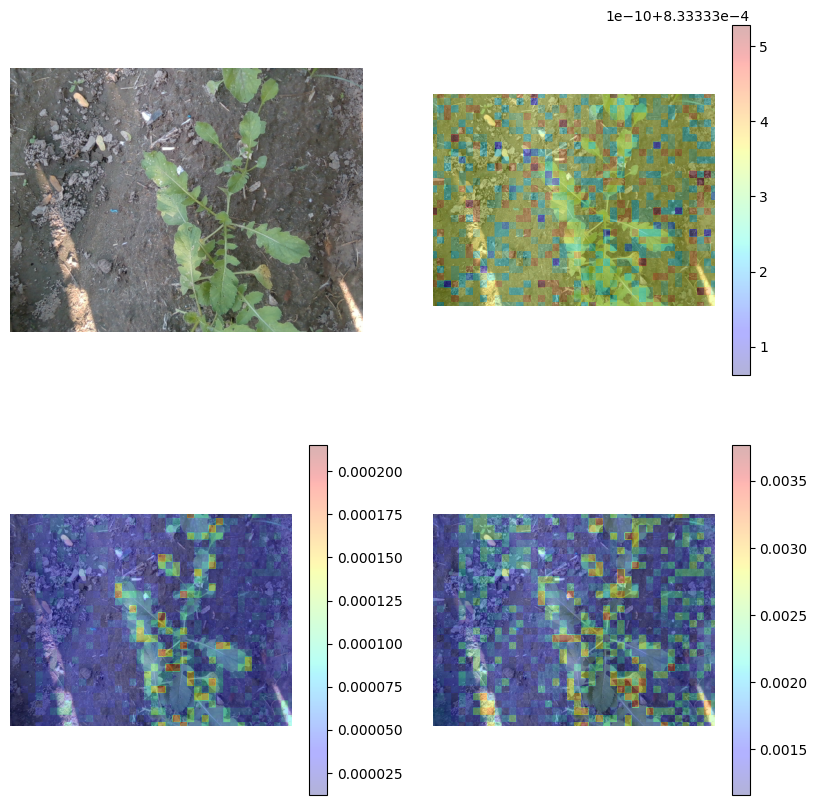

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(new_in[:,:,:3])
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(new_in[:,:,:3])
plt.imshow(i0, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(new_in[:,:,:3])
plt.imshow(i1, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(new_in[:,:,:3])
plt.imshow(i2, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()

week-4-5

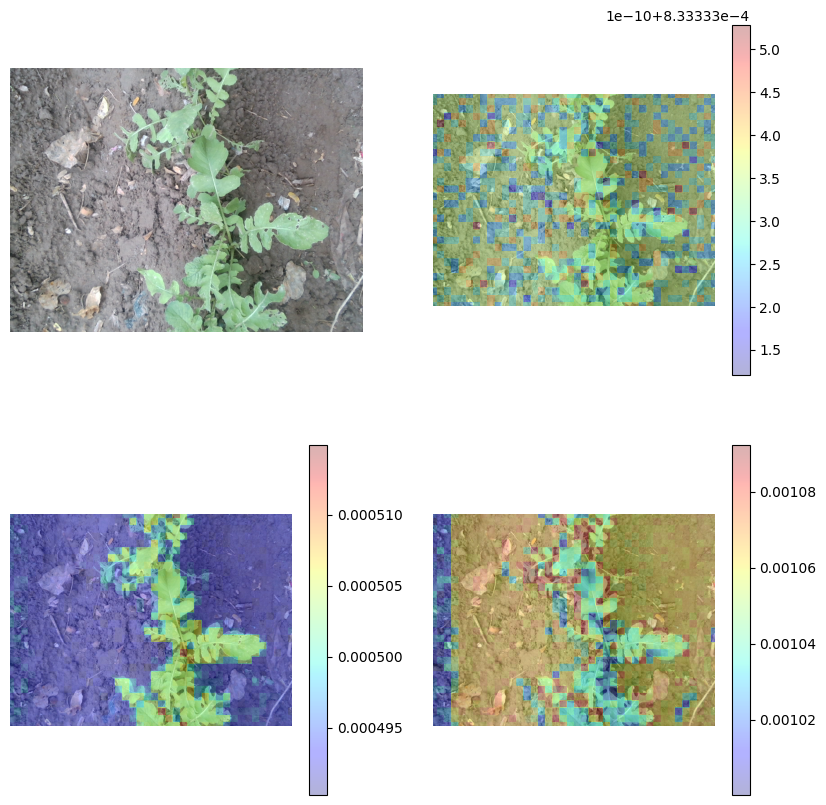

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(new_in[:,:,:3])
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(new_in[:,:,:3])
plt.imshow(i0, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(new_in[:,:,:3])
plt.imshow(i1, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(new_in[:,:,:3])
plt.imshow(i2, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()

week-5-4

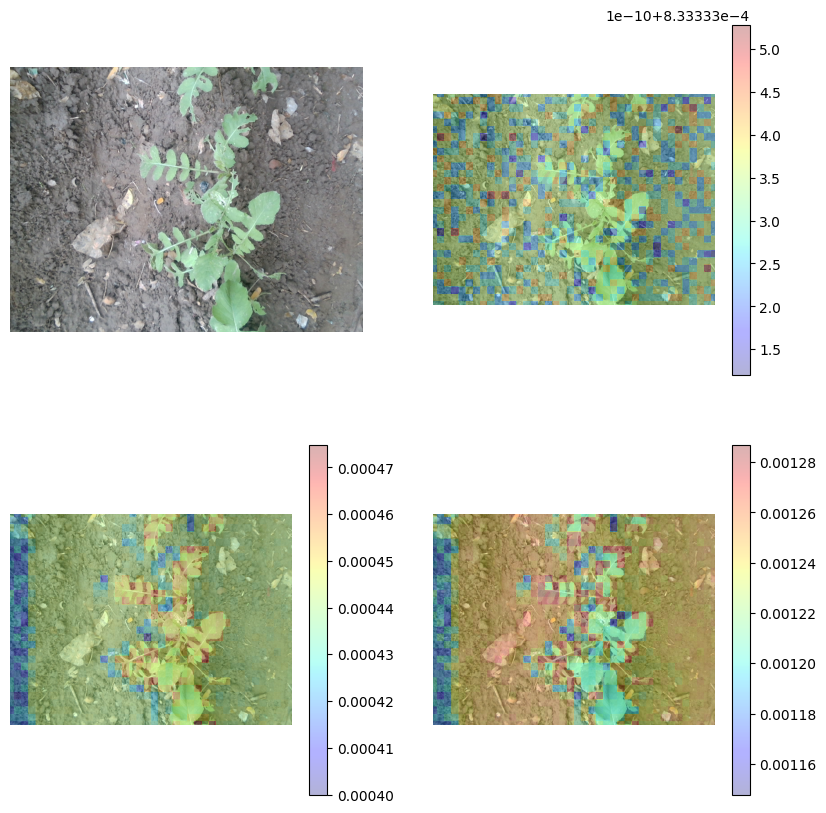

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(new_in[:,:,:3])
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(new_in[:,:,:3])
plt.imshow(i0, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(new_in[:,:,:3])
plt.imshow(i1, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(new_in[:,:,:3])
plt.imshow(i2, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()

week-6-6

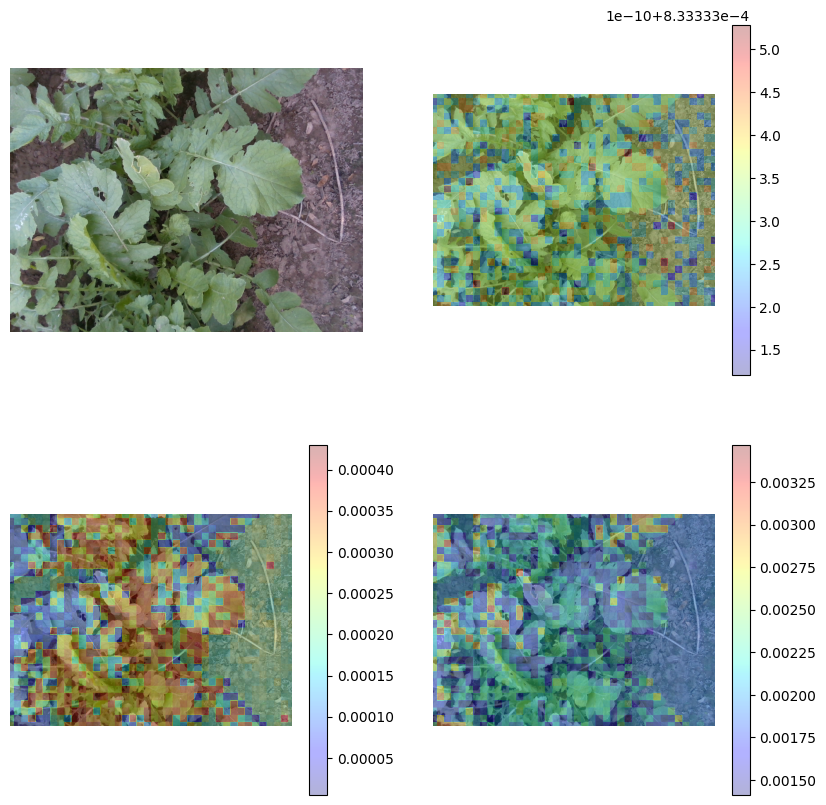

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(new_in[:,:,:3])
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(new_in[:,:,:3])
plt.imshow(i0, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(new_in[:,:,:3])
plt.imshow(i1, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(new_in[:,:,:3])
plt.imshow(i2, cmap='jet', alpha=0.3)
plt.axis("off")
plt.colorbar()